In [3]:
import pandas as pd

def safe_read_csv(path):
	try:
		return pd.read_csv(path)
	except FileNotFoundError:
		print(f"Warning: {path} not found. Skipping.")
		return None

benin = safe_read_csv('data/benin-malanville.csv')
togo = safe_read_csv('data/togo-dapaong_qc.csv')
sierraleone = safe_read_csv('data/sierraleone-bumbuna.csv')

dfs = []
if benin is not None:
	benin['Country'] = 'Benin'
	dfs.append(benin)
if togo is not None:
	togo['Country'] = 'Togo'
	dfs.append(togo)
if sierraleone is not None:
	sierraleone['Country'] = 'Sierra Leone'
	dfs.append(sierraleone)

if dfs:
	df_all = pd.concat(dfs)
else:
	df_all = pd.DataFrame()


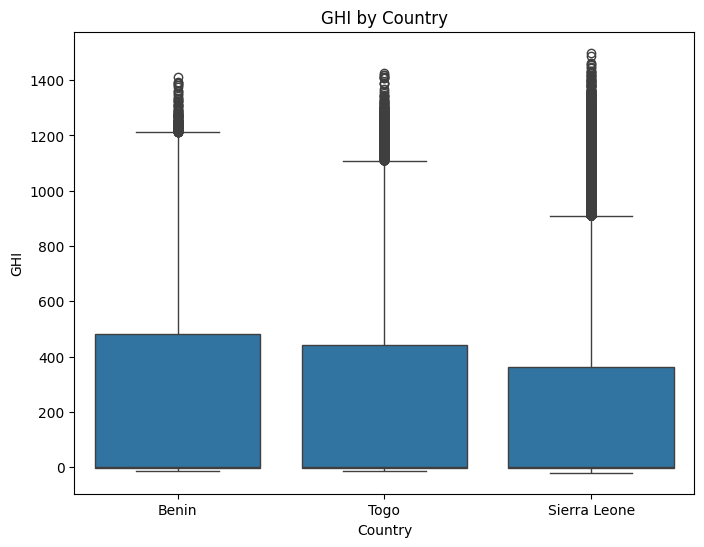

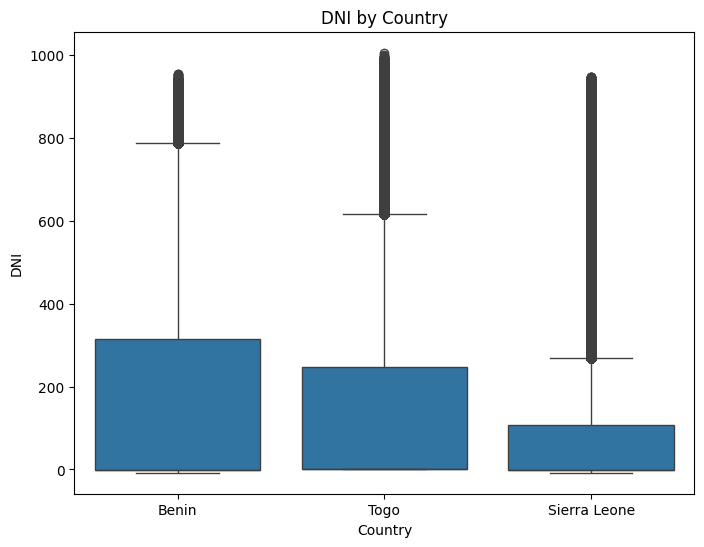

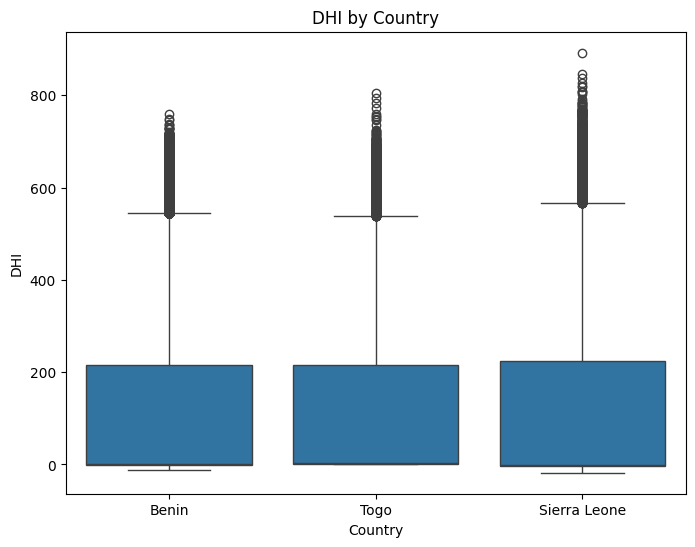

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} by Country')
    plt.show()


In [7]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [10]:
from scipy.stats import f_oneway

# Drop NA for GHI
ghi_benin = benin['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()
ghi_sl = sierraleone['GHI'].dropna()

f_stat, p_val = f_oneway(ghi_benin, ghi_togo, ghi_sl)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 2090.0929, p-value: 0.0000
